### Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading data

Dataset: `video_game_sales.csv` from [Kaggle](https://www.kaggle.com/datasets/gregorut/videogamesales)

In [3]:
sales = pd.read_csv('../datasets/video_game_sales.csv')
sales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [22]:
sales_sorted_year = sales.sort_values(by='Year')

In [20]:
sales_na = sales.loc[:, ['Year', 'NA_Sales']].sort_values(by='Year', axis=0)
sales_eu = sales.loc[:, ['Year', 'EU_Sales']].sort_values(by='Year', axis=0)
sales_jp = sales.loc[:, ['Year', 'JP_Sales']].sort_values(by='Year', axis=0)
sales_ot = sales.loc[:, 'Other_Sales']
sales_gl = sales.loc[:, 'Global_Sales']

/opt/homebrew/anaconda3/envs/dao2702-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


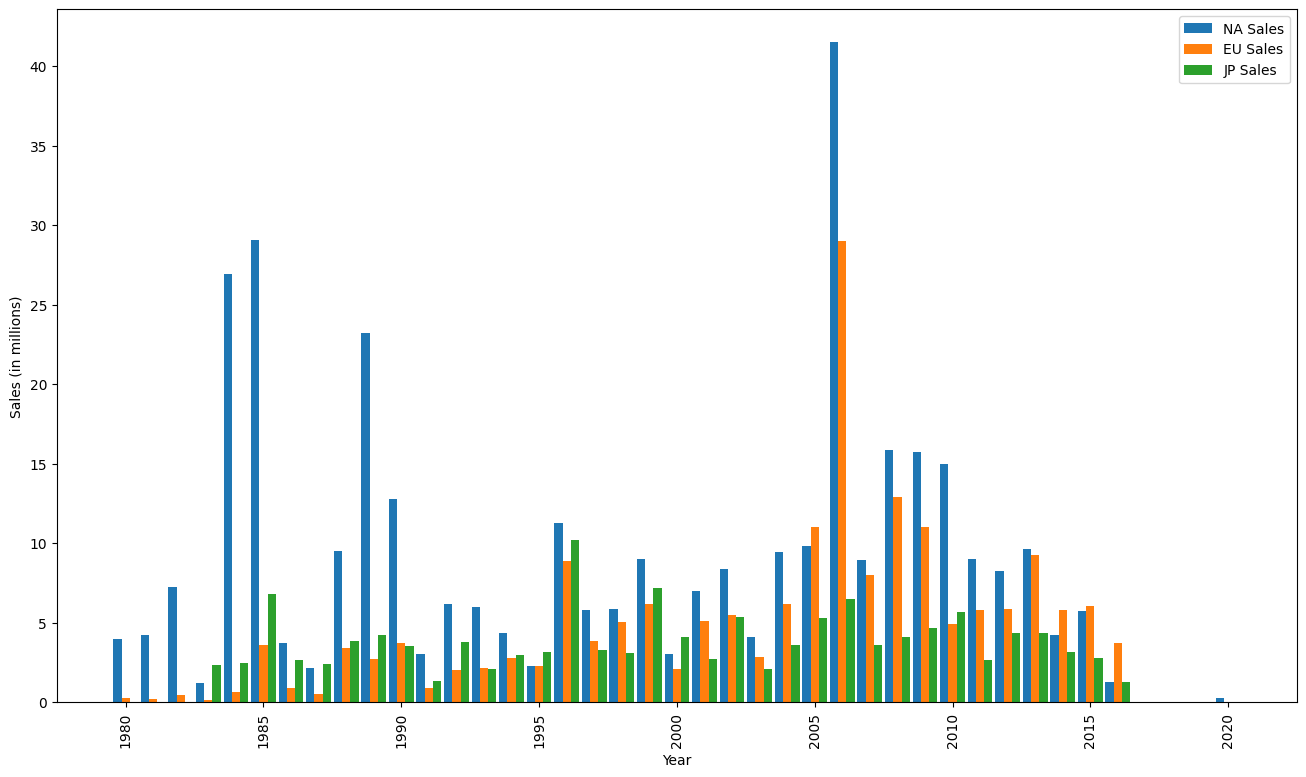

In [25]:
width = 0.3
years = sales_sorted_year['Year']

plt.figure(figsize=(16, 9))
plt.bar(years - width, sales_sorted_year['NA_Sales'], width=width, label='NA Sales')
plt.bar(years, sales_sorted_year['EU_Sales'], width=width, label='EU Sales')
plt.bar(years + width, sales_sorted_year['JP_Sales'], width=width, label='JP Sales')

plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Sales (in millions)')
plt.legend()
plt.show()

### Regional analysis

In [15]:
sales_region_sum = sales.iloc[:, 6:].sum(axis=0)
sales_region_sum

NA_Sales        4392.95
EU_Sales        2434.13
JP_Sales        1291.02
Other_Sales      797.75
Global_Sales    8920.44
dtype: float64

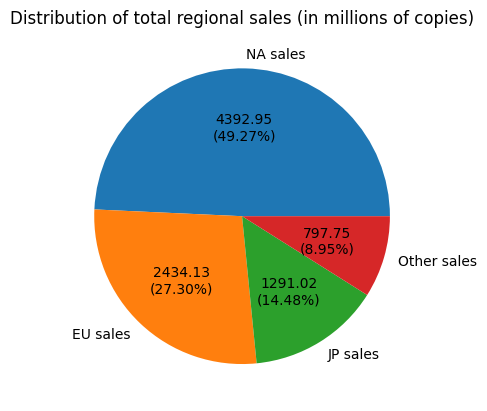

In [24]:
def pct_format(x):
    return '{:.2f}\n({:.2f}%)'.format(x / 100 * sales_region_sum[:-1].sum(), x)

plt.pie(sales_region_sum[:-1], labels=['NA sales', 'EU sales', 'JP sales', 'Other sales'],  autopct=pct_format)
plt.title('Distribution of total regional sales (in millions of copies)')
plt.show()

### Platform analysis

In [31]:
unique_platforms = sales['Platform'].unique()
platform_rows = [sales[sales['Platform'] == platform] for platform in unique_platforms]
platform_global_sales = [rows['Global_Sales'].sum() for rows in platform_rows]

[926.71,
 251.07,
 255.45000000000002,
 822.49,
 979.96,
 957.84,
 1255.6399999999999,
 200.05,
 318.5,
 247.46,
 278.1,
 218.88,
 730.66,
 258.26,
 258.82,
 97.07999999999998,
 296.28000000000003,
 141.06,
 199.35999999999999,
 81.86000000000001,
 28.36,
 15.969999999999999,
 61.930000000000014,
 33.59,
 1.8700000000000003,
 1.42,
 1.4400000000000002,
 0.16,
 0.1,
 0.04,
 0.03]

Text(0, 0.5, 'Global sales (in millions of copies)')

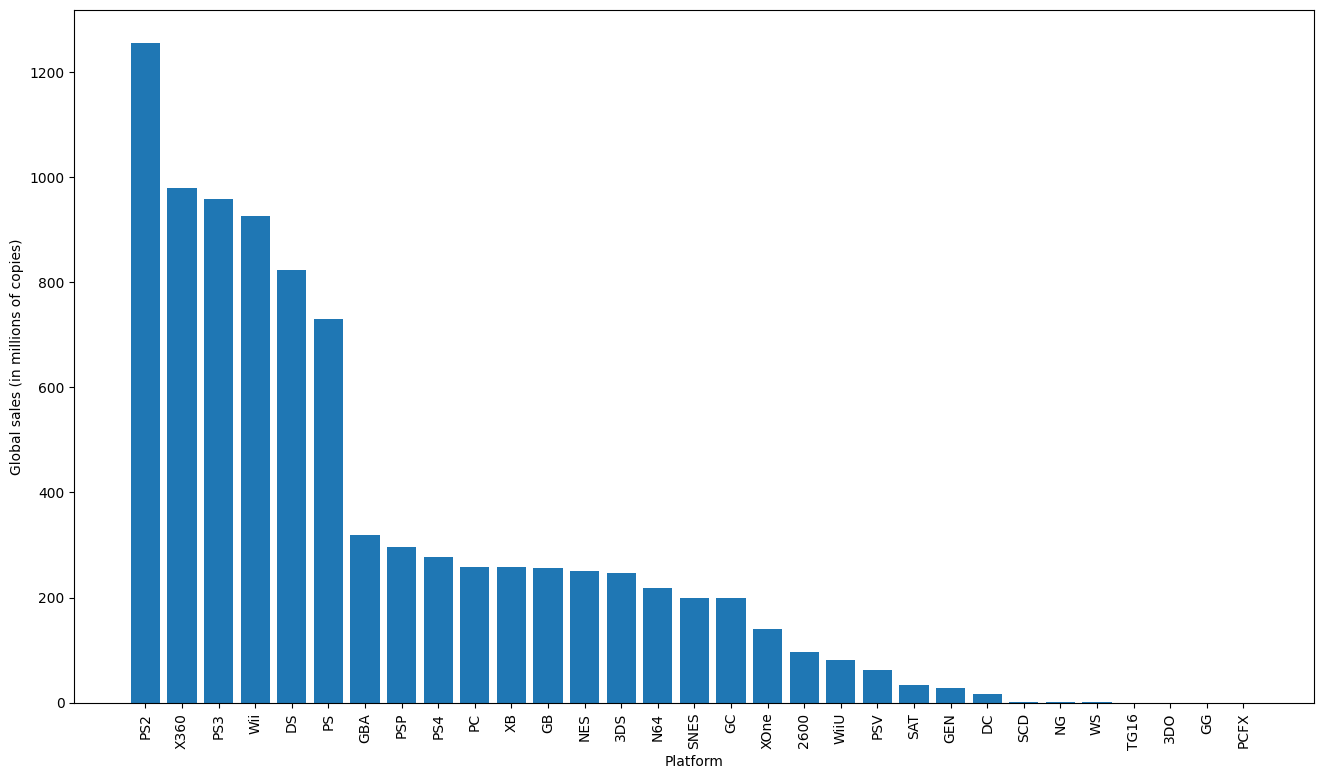

In [57]:
platform_zipped = [[p, s] for p, s in zip(unique_platforms, platform_global_sales)]
platform_zipped.sort(key=lambda x: x[1], reverse=True)
platform_zipped = pd.DataFrame(platform_zipped)

plt.figure(figsize=(16, 9))
plt.bar(platform_zipped.iloc[:, 0], platform_zipped.iloc[:, 1])
plt.xticks(rotation=90)
plt.xlabel('Platform')
plt.ylabel('Global sales (in millions of copies)')

In [71]:
platform_ps2 = sales[sales['Platform'] == 'PS2']
platform_ps2_year_global_sales = platform_ps2.groupby('Year')['Global_Sales'].sum()
pp2ygs_normalised = platform_ps2_year_global_sales / platform_ps2_year_global_sales.max()

platform_ps3 = sales[sales['Platform'] == 'PS3']
platform_ps3_year_global_sales = platform_ps3.groupby('Year')['Global_Sales'].sum()
pp3ygs_normalised = platform_ps3_year_global_sales / platform_ps3_year_global_sales.max()

platform_x360 = sales[sales['Platform'] == 'X360']
platform_x360_year_global_sales = platform_x360.groupby('Year')['Global_Sales'].sum()
px3ygs_normalised = platform_x360_year_global_sales / platform_x360_year_global_sales.max()

platform_wii = sales[sales['Platform'] == 'Wii']
platform_wii_year_global_sales = platform_wii.groupby('Year')['Global_Sales'].sum()
pwiygs_normalised = platform_wii_year_global_sales / platform_wii_year_global_sales.max()

platform_ds = sales[sales['Platform'] == 'DS']
platform_ds_year_global_sales = platform_ds.groupby('Year')['Global_Sales'].sum()
pdsygs_normalised = platform_ds_year_global_sales / platform_ds_year_global_sales.max()

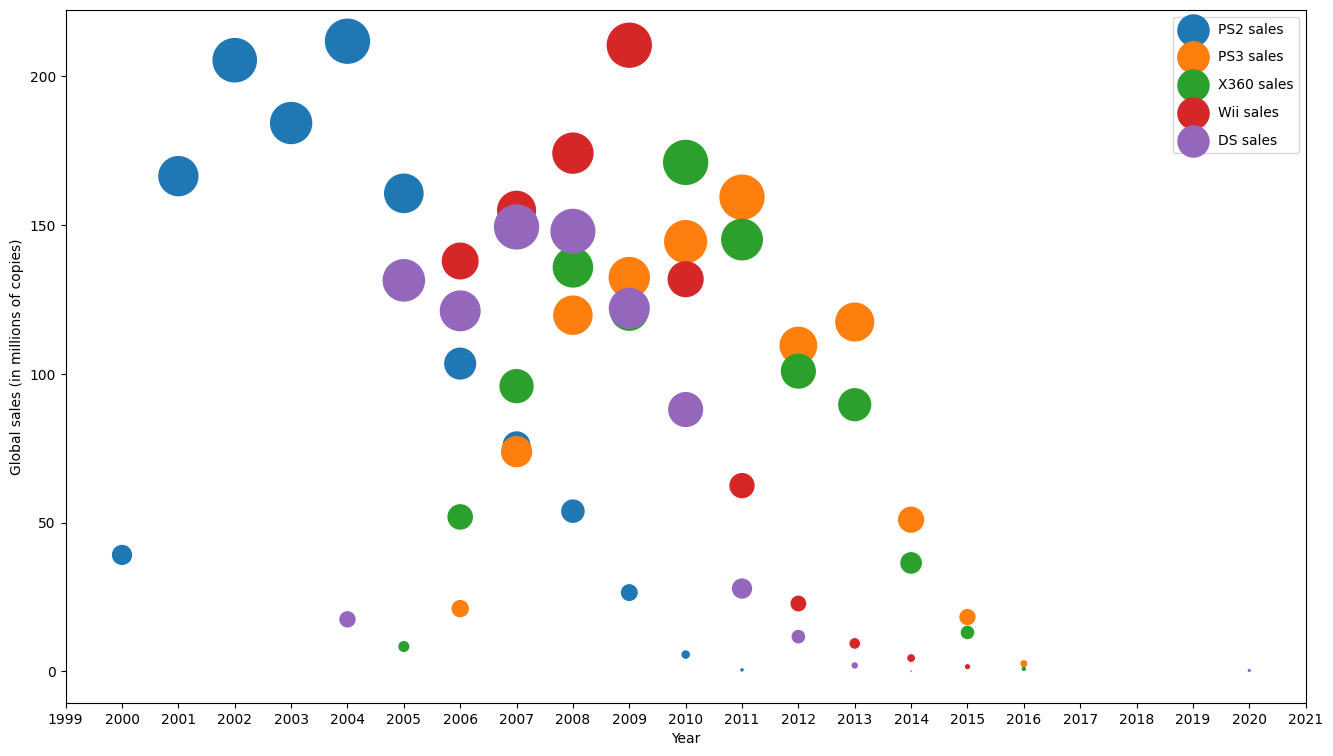

In [84]:
size_mult = 1000
plt.figure(figsize=(16, 9))
plt.scatter(platform_ps2_year_global_sales.index, platform_ps2_year_global_sales, s=pp2ygs_normalised * size_mult, label='PS2 sales')
plt.scatter(platform_ps3_year_global_sales.index, platform_ps3_year_global_sales, s=pp3ygs_normalised * size_mult, label='PS3 sales')
plt.scatter(platform_x360_year_global_sales.index, platform_x360_year_global_sales, s=px3ygs_normalised * size_mult, label='X360 sales')
plt.scatter(platform_wii_year_global_sales.index, platform_wii_year_global_sales, s=pwiygs_normalised * size_mult, label='Wii sales')
plt.scatter(platform_ds_year_global_sales.index, platform_ds_year_global_sales, s=pdsygs_normalised * size_mult, label='DS sales')
plt.xlim((1999, 2021))
plt.xticks(np.arange(1999, 2022, 1))
plt.xlabel('Year')
plt.ylabel('Global sales (in millions of copies)')
plt.legend(labelspacing=1)

### Genre analysis

In [44]:
unique_genres = sales['Genre'].unique()
genre_rows = [sales[sales['Genre'] == genre] for genre in unique_genres]
genre_global_sales = [rows['Global_Sales'].sum() for rows in genre_rows]
genre_global_sales = [[g, s] for g, s in zip(unique_genres, genre_global_sales)]
genre_global_sales.sort(key=lambda x: x[1], reverse=True)
genre_data = pd.DataFrame(genre_global_sales)

Text(0, 0.5, 'Global sales (in millions of copies)')

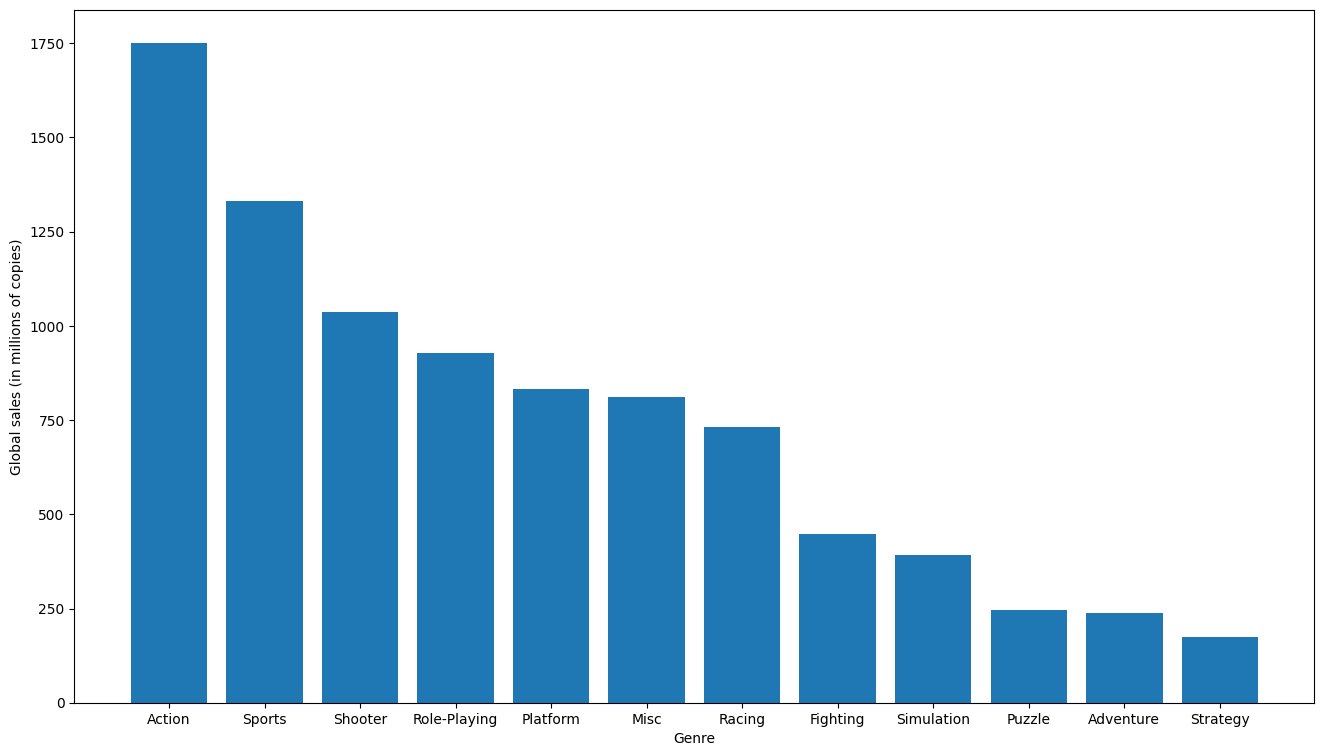

In [5]:
plt.figure(figsize=(16, 9))
plt.bar(genre_data.iloc[:, 0], genre_data.iloc[:, 1])
plt.xlabel('Genre')
plt.ylabel('Global sales (in millions of copies)')

### Publisher analysis

> Only publishers that sold more than 10 million copies are included

In [26]:
unique_publishers = sales['Publisher'].unique()
publisher_rows = [sales[sales['Publisher'] == pub] for pub in unique_publishers]
publisher_global_sales = [rows['Global_Sales'].sum() for rows in publisher_rows]
publisher_global_sales = [[g, s] for g, s in zip(unique_publishers, publisher_global_sales) if s > 10]
publisher_global_sales.sort(key=lambda x: x[1], reverse=True)
publisher_data = pd.DataFrame(publisher_global_sales)
publisher_data.iloc[:, 0]

0                                   Nintendo
1                            Electronic Arts
2                                 Activision
3                Sony Computer Entertainment
4                                    Ubisoft
5                       Take-Two Interactive
6                                        THQ
7               Konami Digital Entertainment
8                                       Sega
9                         Namco Bandai Games
10                    Microsoft Game Studios
11                                    Capcom
12                                     Atari
13    Warner Bros. Interactive Entertainment
14                               Square Enix
15                Disney Interactive Studios
16                         Eidos Interactive
17                                 LucasArts
18                        Bethesda Softworks
19                              Midway Games
20                     Acclaim Entertainment
21                             Vivendi Games
22        

Text(0, 0.5, 'Global sales (in millions of copies)')

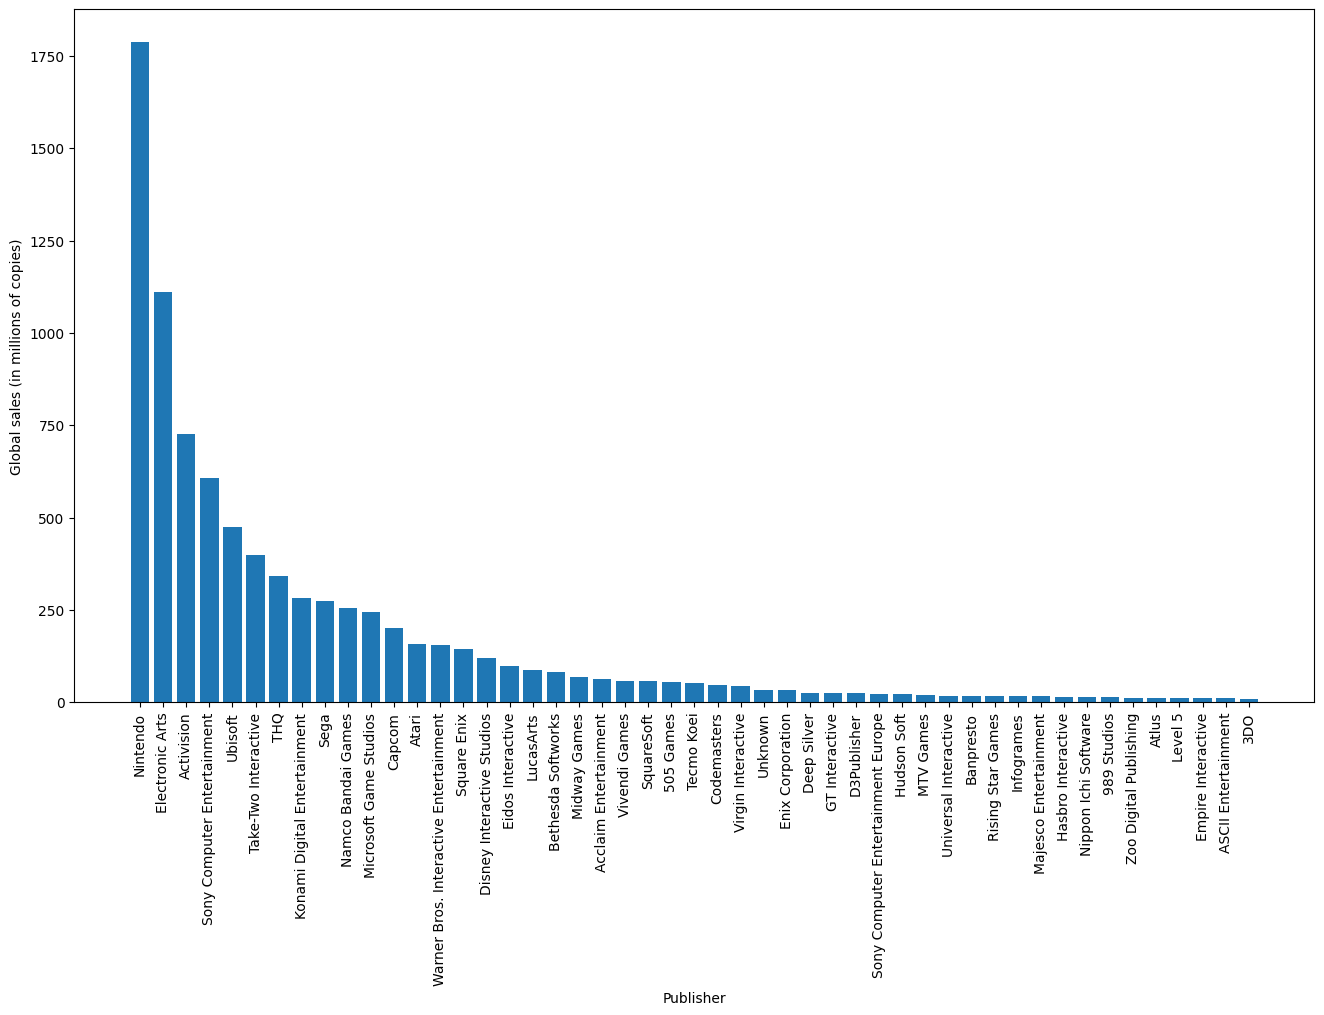

In [27]:
plt.figure(figsize=(16, 9))
plt.bar(publisher_data.iloc[:, 0].astype(str), publisher_data.iloc[:, 1])
plt.xticks(rotation=90)
plt.xlabel('Publisher')
plt.ylabel('Global sales (in millions of copies)')